## Je refais une autre dataframe pour de nouveaux modèles de Machine Learning


In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import scipy.stats as stats 
import numpy as np
from datetime import datetime

df = pd.read_csv('ESP_PUBLIC.IDENTITE_ARBRE.csv', encoding='utf-8')


#### Rétention du minimum de colonnes

In [2]:
df = df.drop(columns=['CODE_PARENT','CODE_PARENT_DESC','VARIETE','EQUIPE', 'REMARQUES','RAISONDEPLANTATION','TRAITEMENTCHENILLES','COURRIER','IDENTIFIANTPLU','TYPEIMPLANTATIONPLU','INTITULEPROTECTIONPLU','ANNEEABATTAGE','ESSOUCHEMENT','DIAMETREARBRE', 'CAUSEABATTAGE'])

In [3]:
print(df.columns.tolist())

['ELEM_POINT_ID', 'CODE', 'NOM', 'GENRE', 'GENRE_DESC', 'CATEGORIE', 'CATEGORIE_DESC', 'SOUS_CATEGORIE', 'SOUS_CATEGORIE_DESC', 'ADR_SECTEUR', 'BIEN_REFERENCE', 'GENRE_BOTA', 'ESPECE', 'STADEDEDEVELOPPEMENT', 'ANNEEDEPLANTATION', 'COLLECTIVITE', 'GeoJSON']


In [4]:
df = df.drop(columns=['ELEM_POINT_ID','CODE','NOM','GENRE','GENRE_DESC','CATEGORIE','CATEGORIE_DESC','SOUS_CATEGORIE','BIEN_REFERENCE','GENRE_BOTA','ESPECE'])

In [5]:
print(df.columns.tolist())

['SOUS_CATEGORIE_DESC', 'ADR_SECTEUR', 'STADEDEDEVELOPPEMENT', 'ANNEEDEPLANTATION', 'COLLECTIVITE', 'GeoJSON']


In [6]:
import json

# Nom de votre colonne (à ajuster)
colonne_geo = 'geo_point_2d'  # ou 'coordinates', 'geometry', etc.

# Extraire latitude et longitude
df['longitude'] = df['GeoJSON'].apply(lambda x: json.loads(x)['coordinates'][0])
df['latitude'] = df['GeoJSON'].apply(lambda x: json.loads(x)['coordinates'][1])

print(df[['longitude', 'latitude']].head())


   longitude   latitude
0   5.720909  45.162338
1   5.704811  45.177938
2   5.704876  45.177932
3   5.704949  45.177936
4   5.705012  45.177932


In [7]:
# Créer un tableau avec seulement les colonnes qui ont des NaN
missing = df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)

if len(missing) > 0:
    missing_df = pd.DataFrame({
        'Colonne': missing.index,
        'Nombre de NaN': missing.values,
        'Pourcentage': (missing.values / len(df) * 100).round(2)
    })
    print(missing_df)
else:
    print("✓ Aucune colonne avec des NaN !")

                Colonne  Nombre de NaN  Pourcentage
0  STADEDEDEVELOPPEMENT           2950         9.33
1     ANNEEDEPLANTATION           1438         4.55
2          COLLECTIVITE            431         1.36


In [8]:
# Liste des colonnes avec des NaN
colonnes_a_nettoyer = ['STADEDEDEVELOPPEMENT', 'ANNEEDEPLANTATION', 'COLLECTIVITE']

# Supprimer les lignes contenant des NaN dans ces colonnes
df_cleaned = df.dropna(subset=colonnes_a_nettoyer)

# Afficher le DataFrame après nettoyage
print(df_cleaned)


           SOUS_CATEGORIE_DESC  ADR_SECTEUR STADEDEDEVELOPPEMENT  \
12             Arbre de voirie            2         Arbre adulte   
15             Arbre de voirie            2         Arbre adulte   
16             Arbre de voirie            2         Arbre adulte   
18     Arbre d'espaces ouverts            4          Arbre jeune   
40     Arbre d'espaces ouverts            4          Arbre jeune   
...                        ...          ...                  ...   
31613  Arbre d'espaces ouverts            5          Arbre jeune   
31614  Arbre d'espaces ouverts            5         Arbre adulte   
31615          Arbre de voirie            5         Arbre adulte   
31616          Arbre de voirie            5          Arbre jeune   
31617          Arbre de voirie            5          Arbre jeune   

       ANNEEDEPLANTATION              COLLECTIVITE  \
12                1970.0         Ville de Grenoble   
15                1970.0         Ville de Grenoble   
16                197

In [9]:
import missingno as msno

<Axes: >

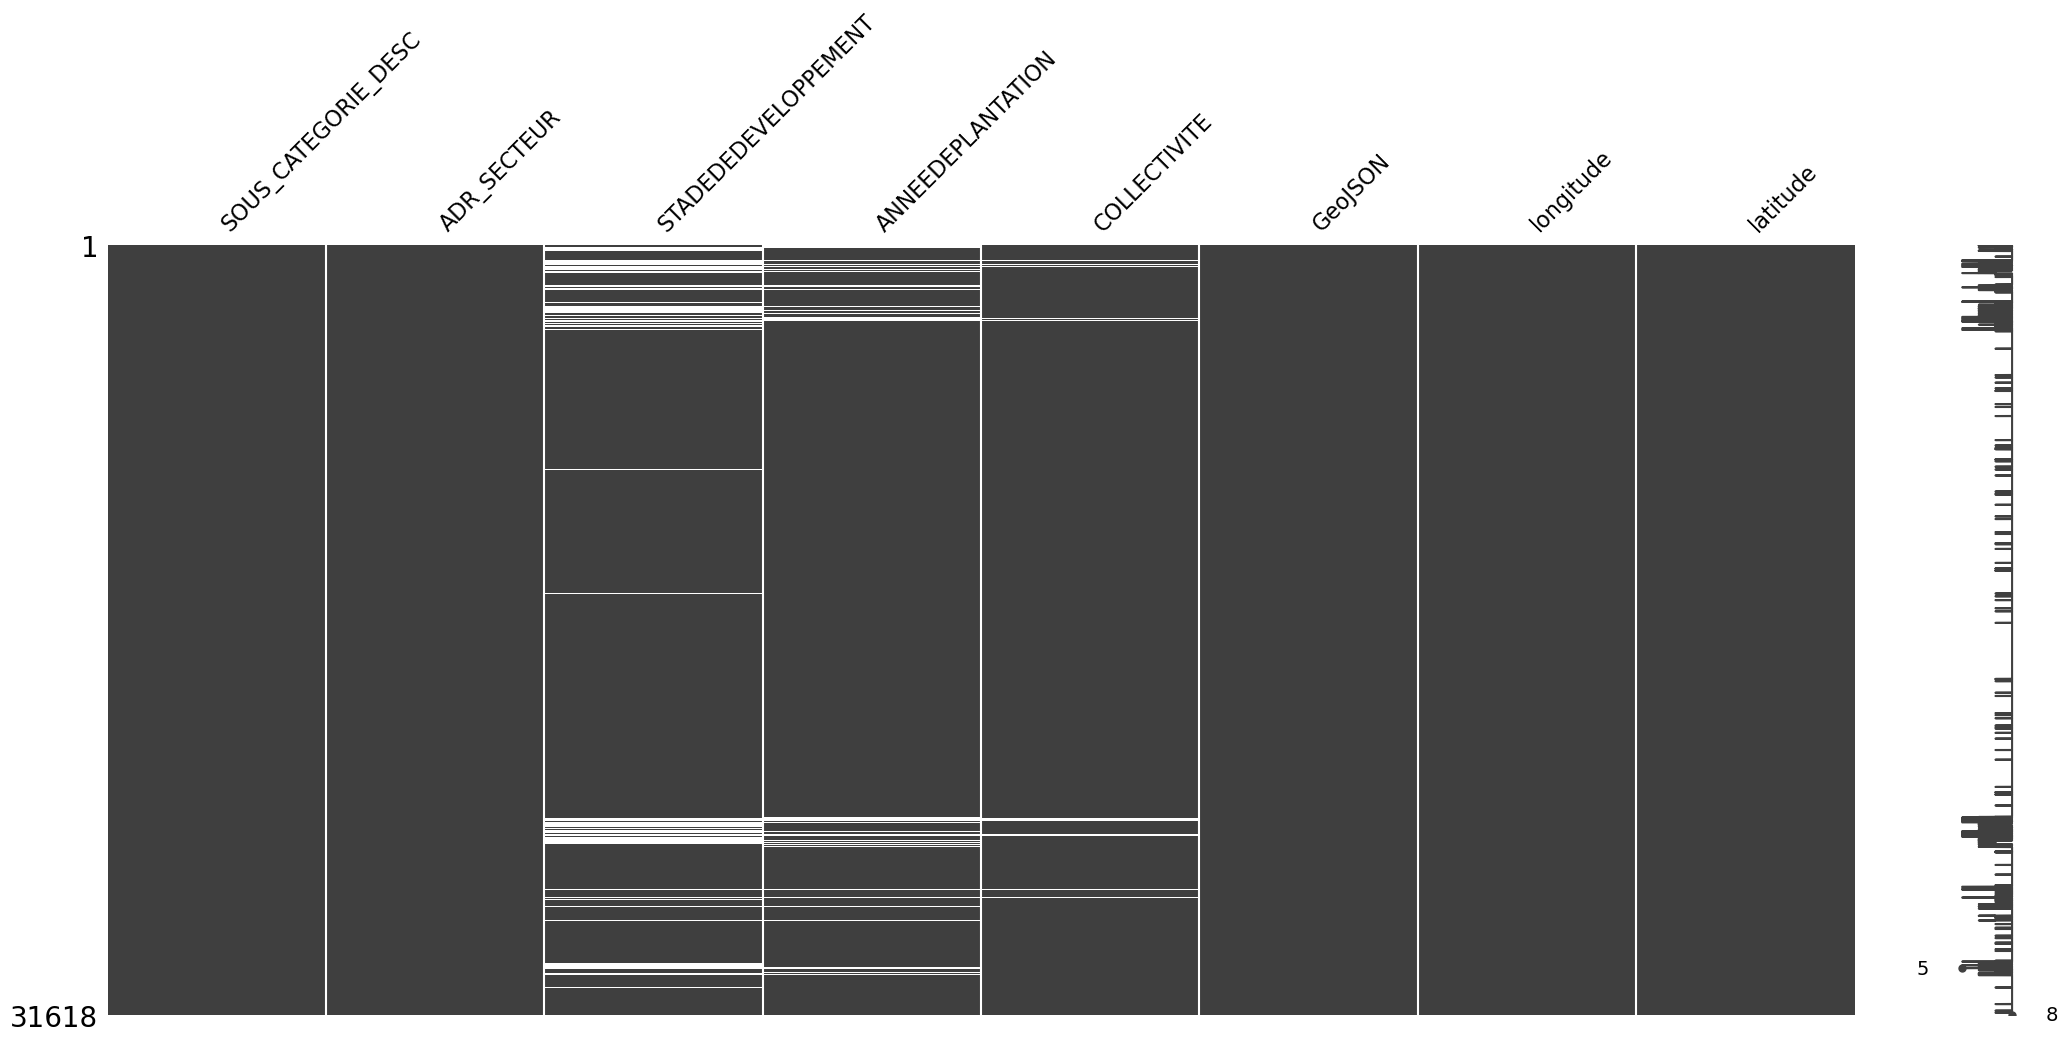

In [10]:
msno.matrix(df)

In [11]:
print(df.columns.tolist())

['SOUS_CATEGORIE_DESC', 'ADR_SECTEUR', 'STADEDEDEVELOPPEMENT', 'ANNEEDEPLANTATION', 'COLLECTIVITE', 'GeoJSON', 'longitude', 'latitude']


In [12]:
print(df.columns.tolist())

['SOUS_CATEGORIE_DESC', 'ADR_SECTEUR', 'STADEDEDEVELOPPEMENT', 'ANNEEDEPLANTATION', 'COLLECTIVITE', 'GeoJSON', 'longitude', 'latitude']


In [13]:
# Liste des colonnes avec des NaN
colonnes_a_nettoyer = [
    'SOUS_CATEGORIE_DESC', 'ADR_SECTEUR', 'STADEDEDEVELOPPEMENT', 
    'ANNEEDEPLANTATION', 'COLLECTIVITE', 'GeoJSON', 'longitude', 'latitude'
]

# Supprimer les lignes contenant des NaN dans ces colonnes
df_cleaned = df.dropna(subset=colonnes_a_nettoyer)

# Afficher le DataFrame après nettoyage
print(df_cleaned)


           SOUS_CATEGORIE_DESC  ADR_SECTEUR STADEDEDEVELOPPEMENT  \
12             Arbre de voirie            2         Arbre adulte   
15             Arbre de voirie            2         Arbre adulte   
16             Arbre de voirie            2         Arbre adulte   
18     Arbre d'espaces ouverts            4          Arbre jeune   
40     Arbre d'espaces ouverts            4          Arbre jeune   
...                        ...          ...                  ...   
31613  Arbre d'espaces ouverts            5          Arbre jeune   
31614  Arbre d'espaces ouverts            5         Arbre adulte   
31615          Arbre de voirie            5         Arbre adulte   
31616          Arbre de voirie            5          Arbre jeune   
31617          Arbre de voirie            5          Arbre jeune   

       ANNEEDEPLANTATION              COLLECTIVITE  \
12                1970.0         Ville de Grenoble   
15                1970.0         Ville de Grenoble   
16                197

In [14]:
df_cleaned.reset_index(drop=True, inplace=True)


In [15]:
# Liste des colonnes à vérifier pour les NaN
colonnes_a_nettoyer = [
    'SOUS_CATEGORIE_DESC', 'ADR_SECTEUR', 'STADEDEDEVELOPPEMENT', 
    'ANNEEDEPLANTATION', 'COLLECTIVITE', 'GeoJSON', 'longitude', 'latitude'
]

# Supprimer les lignes contenant des NaN dans ces colonnes
df_cleaned = df.dropna(subset=colonnes_a_nettoyer)

# Supprimer les lignes complètement vides
df_cleaned = df_cleaned.dropna(how='all')

# Afficher le DataFrame après nettoyage
print(df_cleaned)


           SOUS_CATEGORIE_DESC  ADR_SECTEUR STADEDEDEVELOPPEMENT  \
12             Arbre de voirie            2         Arbre adulte   
15             Arbre de voirie            2         Arbre adulte   
16             Arbre de voirie            2         Arbre adulte   
18     Arbre d'espaces ouverts            4          Arbre jeune   
40     Arbre d'espaces ouverts            4          Arbre jeune   
...                        ...          ...                  ...   
31613  Arbre d'espaces ouverts            5          Arbre jeune   
31614  Arbre d'espaces ouverts            5         Arbre adulte   
31615          Arbre de voirie            5         Arbre adulte   
31616          Arbre de voirie            5          Arbre jeune   
31617          Arbre de voirie            5          Arbre jeune   

       ANNEEDEPLANTATION              COLLECTIVITE  \
12                1970.0         Ville de Grenoble   
15                1970.0         Ville de Grenoble   
16                197

<Axes: >

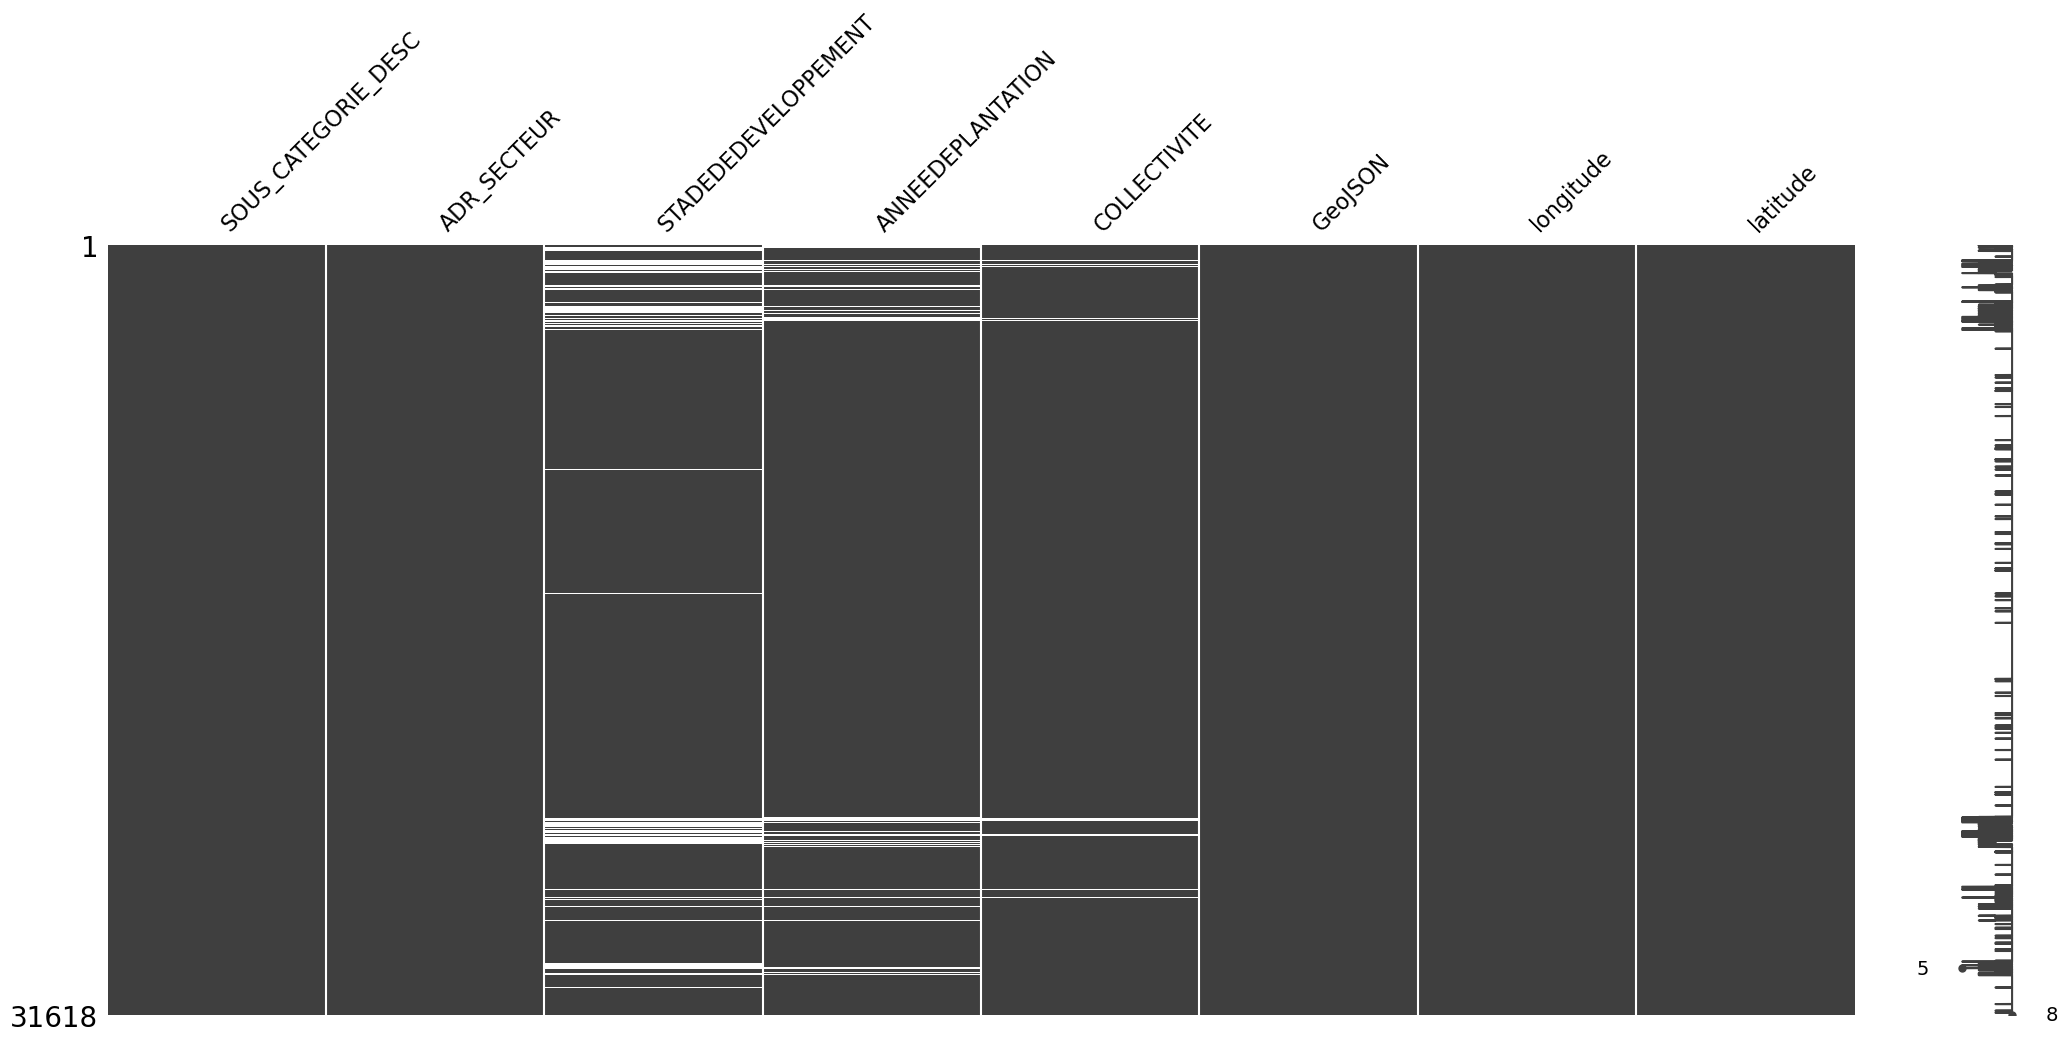

In [16]:
msno.matrix(df)

In [17]:
# Liste des colonnes à vérifier pour les NaN
colonnes_a_nettoyer = [
    'STADEDEDEVELOPPEMENT','ANNEEDEPLANTATION', 'COLLECTIVITE'
]

# Supprimer les lignes contenant des NaN dans ces colonnes
df_cleaned = df.dropna(subset=colonnes_a_nettoyer)

# Supprimer les lignes complètement vides
df_cleaned = df_cleaned.dropna(how='all')

# Afficher le DataFrame après nettoyage
print(df_cleaned)


           SOUS_CATEGORIE_DESC  ADR_SECTEUR STADEDEDEVELOPPEMENT  \
12             Arbre de voirie            2         Arbre adulte   
15             Arbre de voirie            2         Arbre adulte   
16             Arbre de voirie            2         Arbre adulte   
18     Arbre d'espaces ouverts            4          Arbre jeune   
40     Arbre d'espaces ouverts            4          Arbre jeune   
...                        ...          ...                  ...   
31613  Arbre d'espaces ouverts            5          Arbre jeune   
31614  Arbre d'espaces ouverts            5         Arbre adulte   
31615          Arbre de voirie            5         Arbre adulte   
31616          Arbre de voirie            5          Arbre jeune   
31617          Arbre de voirie            5          Arbre jeune   

       ANNEEDEPLANTATION              COLLECTIVITE  \
12                1970.0         Ville de Grenoble   
15                1970.0         Ville de Grenoble   
16                197

In [18]:
print(df.nunique)

<bound method DataFrame.nunique of            SOUS_CATEGORIE_DESC  ADR_SECTEUR STADEDEDEVELOPPEMENT  \
0              Arbre de voirie            6                  NaN   
1              Arbre de voirie            3         Arbre adulte   
2              Arbre de voirie            3         Arbre adulte   
3              Arbre de voirie            3         Arbre adulte   
4              Arbre de voirie            3         Arbre adulte   
...                        ...          ...                  ...   
31613  Arbre d'espaces ouverts            5          Arbre jeune   
31614  Arbre d'espaces ouverts            5         Arbre adulte   
31615          Arbre de voirie            5         Arbre adulte   
31616          Arbre de voirie            5          Arbre jeune   
31617          Arbre de voirie            5          Arbre jeune   

       ANNEEDEPLANTATION              COLLECTIVITE  \
0                    NaN  Grenoble Alpes Métropole   
1                    NaN  Grenoble Alpes

<Axes: >

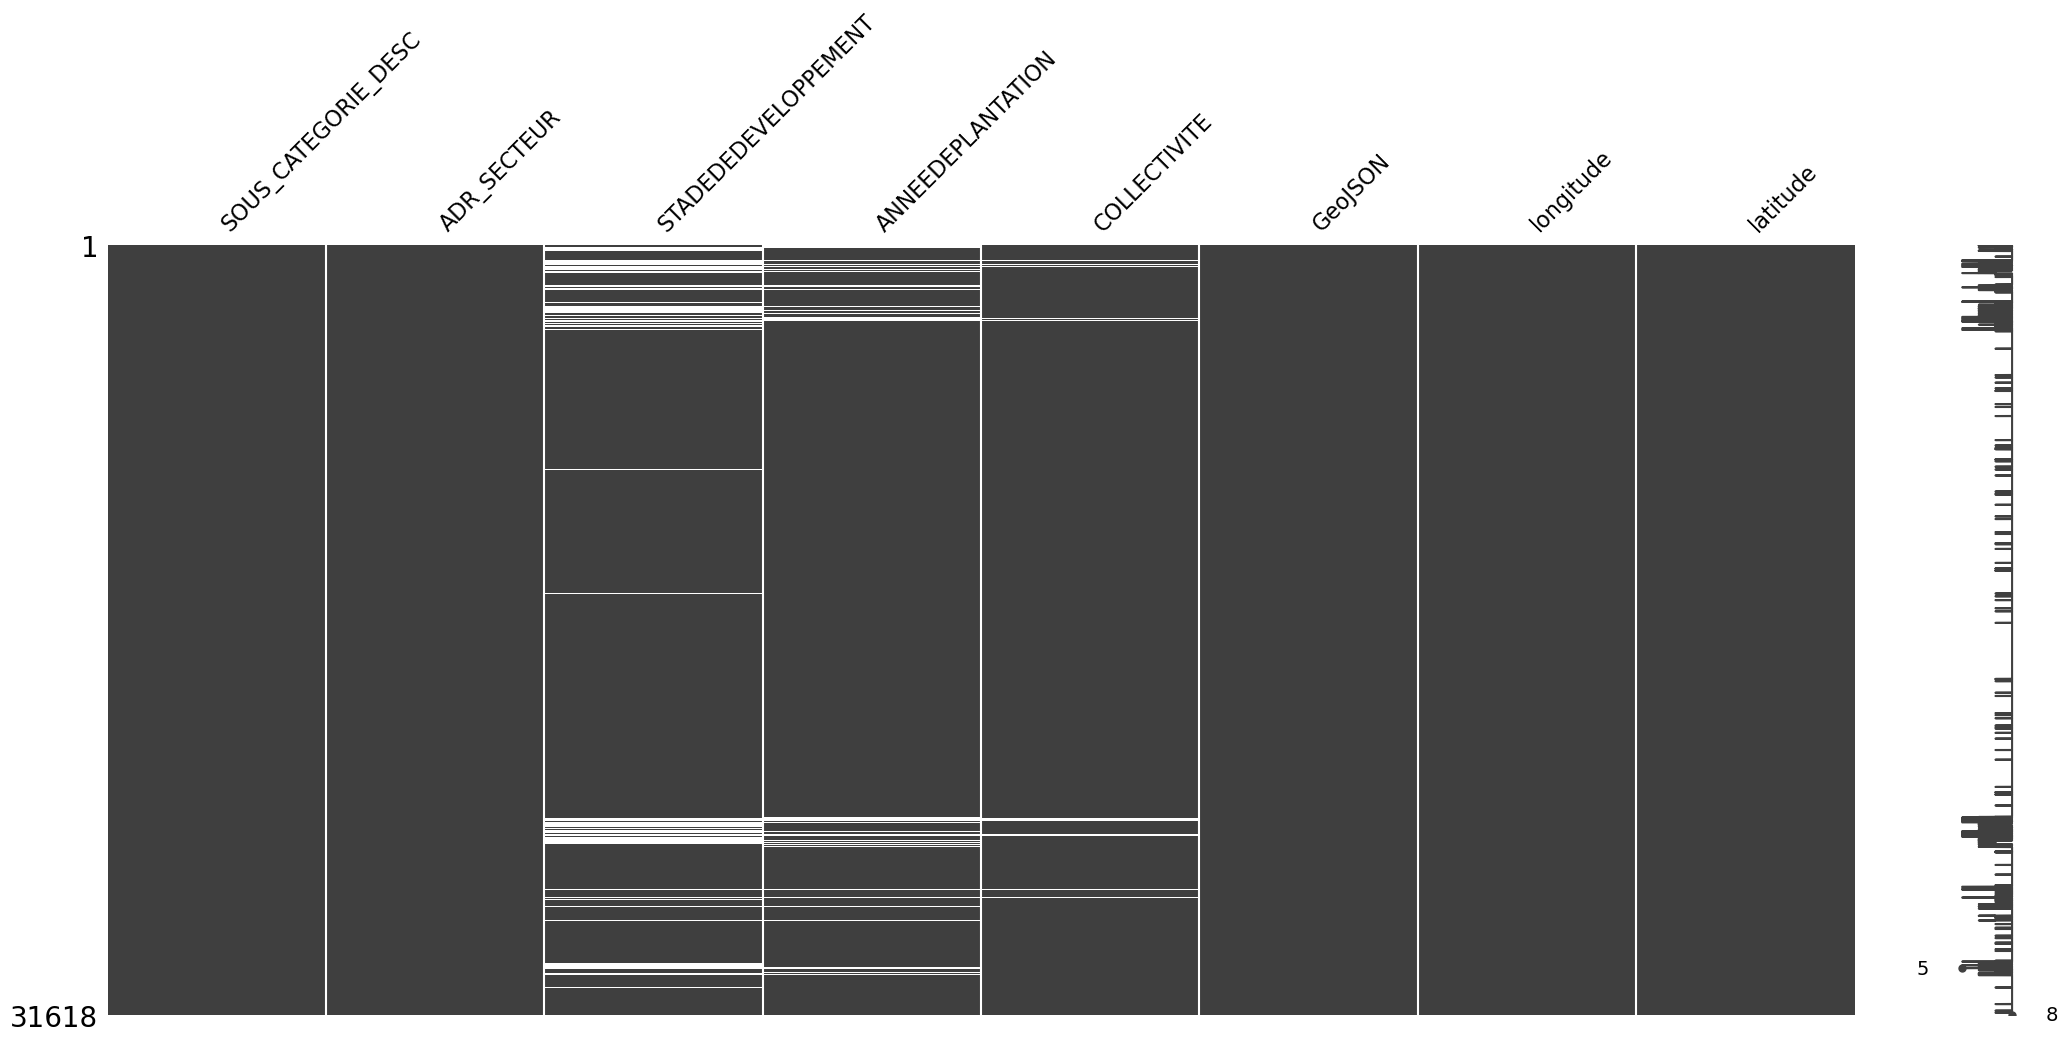

In [19]:
msno.matrix(df)

In [20]:
# Liste des colonnes à vérifier
colonnes_a_verifier = [
    'STADEDEDEVELOPPEMENT','ANNEEDEPLANTATION', 'COLLECTIVITE',
]

# Compter le nombre de NaN (valeurs manquantes) dans chaque colonne spécifiée
missing_counts = df[colonnes_a_verifier].isnull().sum()

# Afficher le nombre de lignes vides dans chaque colonne
print(missing_counts)


STADEDEDEVELOPPEMENT    2950
ANNEEDEPLANTATION       1438
COLLECTIVITE             431
dtype: int64


In [21]:
# Liste des colonnes avec des NaN à vérifier
colonnes_a_verifier = ['STADEDEDEVELOPPEMENT', 'ANNEEDEPLANTATION', 'COLLECTIVITE']

# Supprimer les lignes où toutes les valeurs dans ces colonnes sont NaN
df_cleaned = df.dropna(subset=colonnes_a_verifier, how='all')

# Afficher le DataFrame après nettoyage
print(df_cleaned)


           SOUS_CATEGORIE_DESC  ADR_SECTEUR STADEDEDEVELOPPEMENT  \
0              Arbre de voirie            6                  NaN   
1              Arbre de voirie            3         Arbre adulte   
2              Arbre de voirie            3         Arbre adulte   
3              Arbre de voirie            3         Arbre adulte   
4              Arbre de voirie            3         Arbre adulte   
...                        ...          ...                  ...   
31613  Arbre d'espaces ouverts            5          Arbre jeune   
31614  Arbre d'espaces ouverts            5         Arbre adulte   
31615          Arbre de voirie            5         Arbre adulte   
31616          Arbre de voirie            5          Arbre jeune   
31617          Arbre de voirie            5          Arbre jeune   

       ANNEEDEPLANTATION              COLLECTIVITE  \
0                    NaN  Grenoble Alpes Métropole   
1                    NaN  Grenoble Alpes Métropole   
2                    

In [ ]:
# Liste des colonnes avec des NaN à vérifier
colonnes_a_verifier = ['STADEDEDEVELOPPEMENT', 'ANNEEDEPLANTATION', 'COLLECTIVITE']

# Supprimer les lignes où toutes les valeurs dans ces colonnes sont NaN
df_cleaned = df.dropna(subset=colonnes_a_verifier, how='all')



           SOUS_CATEGORIE_DESC  ADR_SECTEUR STADEDEDEVELOPPEMENT  \
0              Arbre de voirie            6                  NaN   
1              Arbre de voirie            3         Arbre adulte   
2              Arbre de voirie            3         Arbre adulte   
3              Arbre de voirie            3         Arbre adulte   
4              Arbre de voirie            3         Arbre adulte   
...                        ...          ...                  ...   
31613  Arbre d'espaces ouverts            5          Arbre jeune   
31614  Arbre d'espaces ouverts            5         Arbre adulte   
31615          Arbre de voirie            5         Arbre adulte   
31616          Arbre de voirie            5          Arbre jeune   
31617          Arbre de voirie            5          Arbre jeune   

       ANNEEDEPLANTATION              COLLECTIVITE  \
0                    NaN  Grenoble Alpes Métropole   
1                    NaN  Grenoble Alpes Métropole   
2                    

In [24]:
# Compter le nombre de NaN (valeurs manquantes) dans chaque colonne spécifiée
missing_counts = df[colonnes_a_verifier].isnull().sum()

# Afficher le nombre de lignes vides dans chaque colonne
print(missing_counts)

STADEDEDEVELOPPEMENT    2950
ANNEEDEPLANTATION       1438
COLLECTIVITE             431
dtype: int64


In [27]:
# Liste des colonnes à vérifier
colonnes_a_verifier = ['STADEDEDEVELOPPEMENT', 'ANNEEDEPLANTATION', 'COLLECTIVITE']

# Remplacer les chaînes vides par NaN dans les colonnes spécifiées
df[colonnes_a_verifier] = df[colonnes_a_verifier].replace("", float("NaN"))

# Supprimer les lignes où il y a des NaN dans les colonnes spécifiées
df_cleaned = df.dropna(subset=colonnes_a_verifier, how='all')

# Supprimer les lignes totalement vides (c'est-à-dire celles où toutes les colonnes sont NaN)
df_cleaned = df_cleaned.dropna(how='all')

# Afficher le DataFrame après nettoyage
print(df_cleaned)


           SOUS_CATEGORIE_DESC  ADR_SECTEUR STADEDEDEVELOPPEMENT  \
0              Arbre de voirie            6                  NaN   
1              Arbre de voirie            3         Arbre adulte   
2              Arbre de voirie            3         Arbre adulte   
3              Arbre de voirie            3         Arbre adulte   
4              Arbre de voirie            3         Arbre adulte   
...                        ...          ...                  ...   
31613  Arbre d'espaces ouverts            5          Arbre jeune   
31614  Arbre d'espaces ouverts            5         Arbre adulte   
31615          Arbre de voirie            5         Arbre adulte   
31616          Arbre de voirie            5          Arbre jeune   
31617          Arbre de voirie            5          Arbre jeune   

       ANNEEDEPLANTATION              COLLECTIVITE  \
0                    NaN  Grenoble Alpes Métropole   
1                    NaN  Grenoble Alpes Métropole   
2                    

In [28]:
# Liste des colonnes à vérifier
colonnes_a_verifier = [
    'STADEDEDEVELOPPEMENT','ANNEEDEPLANTATION', 'COLLECTIVITE',
]

# Compter le nombre de NaN (valeurs manquantes) dans chaque colonne spécifiée
missing_counts = df[colonnes_a_verifier].isnull().sum()

# Afficher le nombre de lignes vides dans chaque colonne
print(missing_counts)

STADEDEDEVELOPPEMENT    2950
ANNEEDEPLANTATION       1438
COLLECTIVITE             431
dtype: int64


In [29]:
# Liste des colonnes à vérifier
colonnes_a_verifier = ['STADEDEDEVELOPPEMENT', 'ANNEEDEPLANTATION', 'COLLECTIVITE']

# Remplacer les chaînes vides par NaN dans les colonnes spécifiées
df[colonnes_a_verifier] = df[colonnes_a_verifier].replace("", float("NaN"))

# Supprimer les lignes où il y a des NaN ou des valeurs vides dans ces colonnes spécifiées
df_cleaned = df.dropna(subset=colonnes_a_verifier, how='all')

# Supprimer les lignes totalement vides (où toutes les colonnes sont NaN)
df_cleaned = df_cleaned.dropna(how='all')

# Afficher le DataFrame après nettoyage
print(df_cleaned)


           SOUS_CATEGORIE_DESC  ADR_SECTEUR STADEDEDEVELOPPEMENT  \
0              Arbre de voirie            6                  NaN   
1              Arbre de voirie            3         Arbre adulte   
2              Arbre de voirie            3         Arbre adulte   
3              Arbre de voirie            3         Arbre adulte   
4              Arbre de voirie            3         Arbre adulte   
...                        ...          ...                  ...   
31613  Arbre d'espaces ouverts            5          Arbre jeune   
31614  Arbre d'espaces ouverts            5         Arbre adulte   
31615          Arbre de voirie            5         Arbre adulte   
31616          Arbre de voirie            5          Arbre jeune   
31617          Arbre de voirie            5          Arbre jeune   

       ANNEEDEPLANTATION              COLLECTIVITE  \
0                    NaN  Grenoble Alpes Métropole   
1                    NaN  Grenoble Alpes Métropole   
2                    

In [30]:
# Liste des colonnes à vérifier
colonnes_a_verifier = [
    'STADEDEDEVELOPPEMENT','ANNEEDEPLANTATION', 'COLLECTIVITE',
]

# Compter le nombre de NaN (valeurs manquantes) dans chaque colonne spécifiée
missing_counts = df[colonnes_a_verifier].isnull().sum()

# Afficher le nombre de lignes vides dans chaque colonne
print(missing_counts)

STADEDEDEVELOPPEMENT    2950
ANNEEDEPLANTATION       1438
COLLECTIVITE             431
dtype: int64


In [31]:
# Liste des colonnes à vérifier
colonnes_a_verifier = ['STADEDEDEVELOPPEMENT', 'ANNEEDEPLANTATION', 'COLLECTIVITE']

# Nettoyer les espaces dans les colonnes spécifiées
df[colonnes_a_verifier] = df[colonnes_a_verifier].applymap(lambda x: x.strip() if isinstance(x, str) else x)

# Remplacer les chaînes vides par NaN dans les colonnes spécifiées
df[colonnes_a_verifier] = df[colonnes_a_verifier].replace("", float("NaN"))

# Supprimer les lignes où toutes les colonnes spécifiées ont des NaN
df_cleaned = df.dropna(subset=colonnes_a_verifier, how='all')

# Supprimer les lignes complètement vides (c'est-à-dire celles où toutes les colonnes sont NaN)
df_cleaned = df_cleaned.dropna(how='all')

# Afficher le DataFrame après nettoyage
print(df_cleaned)


           SOUS_CATEGORIE_DESC  ADR_SECTEUR STADEDEDEVELOPPEMENT  \
0              Arbre de voirie            6                  NaN   
1              Arbre de voirie            3         Arbre adulte   
2              Arbre de voirie            3         Arbre adulte   
3              Arbre de voirie            3         Arbre adulte   
4              Arbre de voirie            3         Arbre adulte   
...                        ...          ...                  ...   
31613  Arbre d'espaces ouverts            5          Arbre jeune   
31614  Arbre d'espaces ouverts            5         Arbre adulte   
31615          Arbre de voirie            5         Arbre adulte   
31616          Arbre de voirie            5          Arbre jeune   
31617          Arbre de voirie            5          Arbre jeune   

       ANNEEDEPLANTATION              COLLECTIVITE  \
0                    NaN  Grenoble Alpes Métropole   
1                    NaN  Grenoble Alpes Métropole   
2                    

C:\Users\somei\AppData\Local\Temp\ipykernel_25104\933551468.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[colonnes_a_verifier] = df[colonnes_a_verifier].applymap(lambda x: x.strip() if isinstance(x, str) else x)


In [32]:
# Liste des colonnes à vérifier
colonnes_a_verifier = [
    'STADEDEDEVELOPPEMENT','ANNEEDEPLANTATION', 'COLLECTIVITE',
]

# Compter le nombre de NaN (valeurs manquantes) dans chaque colonne spécifiée
missing_counts = df[colonnes_a_verifier].isnull().sum()

# Afficher le nombre de lignes vides dans chaque colonne
print(missing_counts)

STADEDEDEVELOPPEMENT    2950
ANNEEDEPLANTATION       1438
COLLECTIVITE             431
dtype: int64


In [34]:
df = df.drop(columns=['GeoJSON'])

In [35]:
import pickle

df.to_pickle("df_trees_bis.pkl")